In [ ]:
#importing the API's
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow
import skimage.color
import skimage.io
from sklearn.cluster import KMeans
import numpy as np
from itertools import chain
from skimage.filters import gaussian, gabor, gabor_kernel, threshold_otsu
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Access the images and show them, just to check if you are working with the correct set of images. 

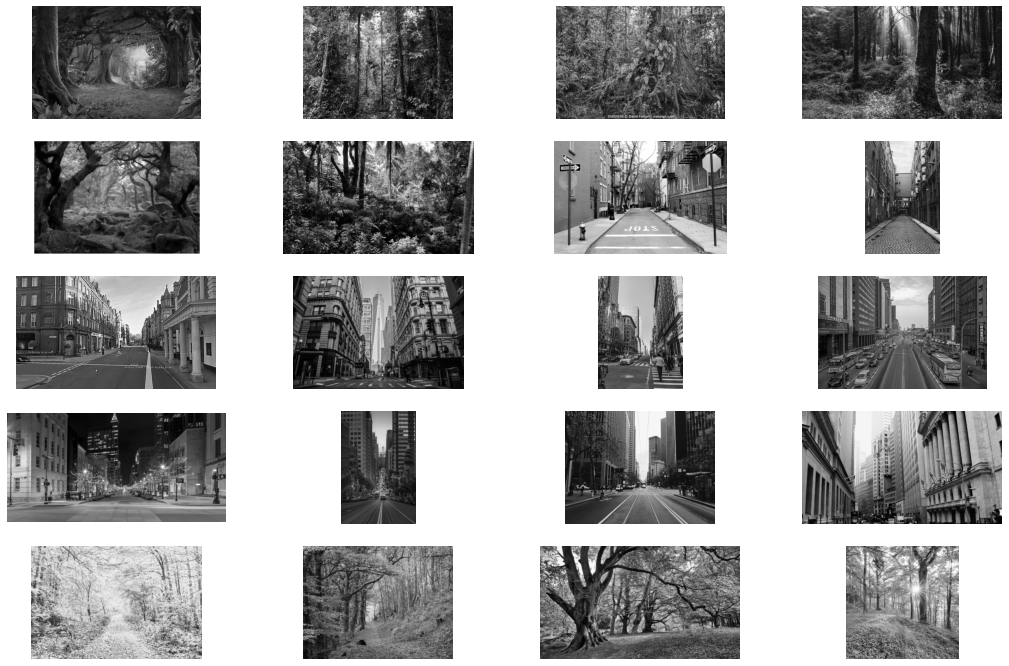

In [ ]:
images = glob.glob('/content/drive/MyDrive/PBV/Assignment-3/City-Forest/*.jpg') #reading all the image files from the folder
j=1
i=0
img=[]
plt.figure(figsize=(18, 12))
for image in images:
  imgtmp = cv.imread(image)
  imgtmp = cv.cvtColor(imgtmp, cv.COLOR_BGR2GRAY) #coverting the image to grayscale
  imgtmp = imgtmp.astype(float) # converting the image value to float type
  img.append(imgtmp)
  plt.subplot(5,4,j) #plotting the image
  plt.imshow(img[i], cmap='gray')
  plt.axis('off')
  i+=1
  j+=1
plt.show()

2a. Create DoG and extract edges.

In [ ]:
#finding the difference of gaussian same as the assignment 1
def difference_of_gaussian(image, low_sigma, high_sigma=None, *, mode='nearest', cval=0, channel_axis=None, truncate=4.0, multichannel=False):
  image = image.astype(float)
  spatial_dims = image.ndim
  low_sigma = np.array(low_sigma, dtype='float', ndmin=1) * np.ones(spatial_dims)
  high_sigma = np.array(high_sigma, dtype='float', ndmin=1) * np.ones(spatial_dims)
  image = gaussian(image, low_sigma, mode=mode, cval=cval, multichannel=multichannel, truncate=truncate) - gaussian(image, high_sigma , mode=mode, cval=cval, multichannel=multichannel, truncate=truncate)
  min = np.amin(image)
  return image - min 

In [ ]:
i=0
j=1
list_dog=[]


plt.figure(figsize=(20, 100))
for i in range(20):
  list_dog.append(difference_of_gaussian(image=img[i], low_sigma=1, high_sigma=5)) # finding the difference of gaussian for all the iamge
  #plotting the images
  plt.subplot(20,2,j)
  plt.imshow(img[i], cmap='gray')
  plt.axis('off')
  plt.title('Original Image')
  j+=1

  plt.subplot(20,2,j)
  plt.imshow(list_dog[i], cmap='gray')
  plt.axis('off')
  plt.title('DoG Image')
  j+=1
plt.show()

2b. Create DoG and extract edges.

In [ ]:
filtlist_0=[]
filtlist_45=[]
filtlist_90=[]
filtlist_135=[]
filtlist_noedge=[]
histogram_list=[]
import numpy as np
import matplotlib.pyplot as plt

j=1
plt.figure(figsize=(18, 100))
for i in range(20):
  size = img[i].shape[0] * img[i].shape[1]
  plt.subplot(20,2,j)
  plt.imshow(img[i],cmap='gray')
  plt.axis('off')
  plt.title('Original Image')
  j+=1
  filtlist_0.append(cv.filter2D(list_dog[i],-1, np.array([[-1, 2, -1], [-2, 4, -2], [-1, 2, -1]]))) #convolution of 0 degree filter on original image
  filtlist_45.append(cv.filter2D(list_dog[i],-1, np.array([[-2, -1, 2], [-1, 4, -1], [2, -1, -2]]))) #convolution of 45 degree filter on original image
  filtlist_90.append(cv.filter2D(list_dog[i],-1, np.array([[-1, -2, -1], [2, 4, 2], [-1, -2, -1]]))) #convolution of 90 degree filter on original image
  filtlist_135.append(cv.filter2D(list_dog[i],-1, np.array([[2, -1, -2], [-1, 4, -1], [-2, -1, 2]]))) #convolution of 135 degree filter on original image
  filtlist_noedge.append(cv.filter2D(list_dog[i],-1, np.array([[-1, -1, -1],  [-1 ,8, -1], [-1, -1,-1]]))) #convolution of noedge laplacian filter on original image

  #finding the maximum edge degree at a particular point in a image and incrementing its count
  h,w = filtlist_0[i].shape
  noedge_0 = 0
  noedge_45 = 0
  noedge_90 = 0
  noedge_135 = 0
  noedge_noedge = 0
  for x in range(h):
    for y in range(w):
      if filtlist_0[i][x][y] > filtlist_45[i][x][y] and filtlist_0[i][x][y] > filtlist_90[i][x][y] and filtlist_0[i][x][y] > filtlist_135[i][x][y] and filtlist_0[i][x][y] > filtlist_noedge[i][x][y]:
        noedge_0 +=1
      elif filtlist_45[i][x][y] > filtlist_90[i][x][y] and filtlist_45[i][x][y] > filtlist_135[i][x][y] and filtlist_45[i][x][y] > filtlist_noedge[i][x][y]:
        noedge_45 +=1
      elif filtlist_90[i][x][y] > filtlist_135[i][x][y] and filtlist_90[i][x][y] > filtlist_noedge[i][x][y]:
        noedge_90 +=1
      elif filtlist_135[i][x][y] > filtlist_noedge[i][x][y]:
        noedge_135 +=1
      else:
        noedge_noedge+=1
  #normalizing the count of each edge degree to bring in the range of 0-1
  noedge_0=noedge_0/size
  noedge_45=noedge_45/size
  noedge_90=noedge_90/size
  noedge_135=noedge_135/size
  noedge_noedge=noedge_noedge/size

  #storing the values in the list
  temp_list=[]
  temp_list.append(noedge_0)
  temp_list.append(noedge_45)
  temp_list.append(noedge_90)
  temp_list.append(noedge_135)
  temp_list.append(noedge_noedge)
  histogram_list.append(temp_list)

  #plotting the normalized frequency histogram
  histogram = {'0 Degree':noedge_0, '45 Degree':noedge_45, '90 Degree': noedge_90, '135 Degree' :noedge_135, 'No Edge': noedge_noedge}
  plt.subplot(20,2,j)
  plt.bar(histogram.keys(),histogram.values(), color ='red',width = 0.5)
  plt.title('Histogram')
  j+=1
plt.show()

3. Observe the four oriented edge orientation maps and the corresponding histograms for a few forest and city images, and comment on the differences observed

In [ ]:
#printing the oriented edge images and corresponding histogram
j=1
plt.figure(figsize=(50, 200))
for i in range(20):
  #printing 0 degree image
  plt.subplot(20,5,j)
  plt.imshow(filtlist_0[i],cmap='gray')
  plt.axis('off')
  plt.title('0 degree Image')
  j+=1
  #printing 45 degree image
  plt.subplot(20,5,j)
  plt.imshow(filtlist_45[i],cmap='gray')
  plt.axis('off')
  plt.title('45 degree Image')
  j+=1
  #printing 90 degree image
  plt.subplot(20,5,j)
  plt.imshow(filtlist_90[i],cmap='gray')
  plt.axis('off')
  plt.title('90 degree Image')
  j+=1
  #printing 135 degree image
  plt.subplot(20,5,j)
  plt.imshow(filtlist_135[i],cmap='gray')
  plt.axis('off')
  plt.title('135 degree Image')
  j+=1
  #printing edge normalized frequency histogram
  histogram = {'0 Degree':histogram_list[i][0], '45 Degree':histogram_list[i][1], '90 Degree': histogram_list[i][2], '135 Degree' :histogram_list[i][3], 'No Degree': histogram_list[i][4]}
  plt.subplot(20,5,j)
  plt.bar(histogram.keys(),histogram.values(), color ='red',width = 0.5)
  plt.title('Histogram')
  j+=1

plt.show()


My Observations:
Observations mentioned in report

4. Apply k-means clustering algorithm (k=2) on the histograms, and show the images in each cluster separately. Comment on the clustering performance

In [ ]:
hist_list_flatten = [j for sub in histogram_list for j in sub] # flattening 20*5 list to 100
kmeans = KMeans(n_clusters=2) #calling the Kmeans method with 2 clusters
kmeans.fit(np.array(hist_list_flatten).reshape(-1,1)) #fitting the kmeans model on the flatten list


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0]


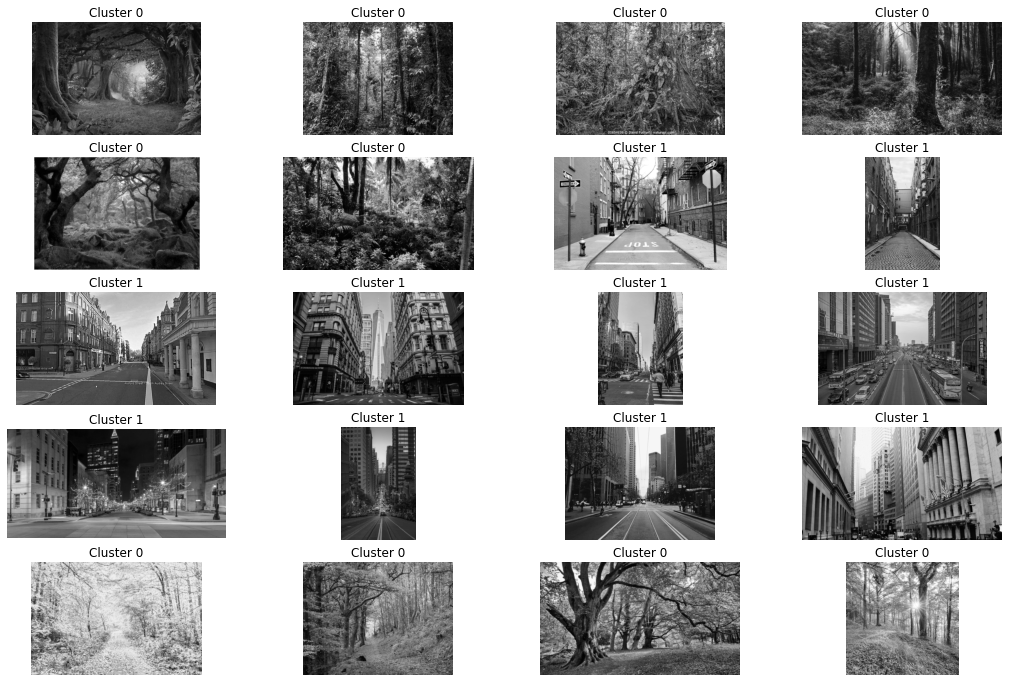

In [ ]:
print(kmeans.labels_) #printing the cluster label assigned to each edge image frequency count
x=0
y=1
plt.figure(figsize=(18, 12))
for i in range (0,100,5):
  count_0=0
  count_1=0
  #finding the maximum edge belongs to which cluster in particular image and allocating that image to that cluster
  for j in range(5):
    z=kmeans.labels_[i+j]
    if z==0:
      count_0+=1
    else:
      count_1+=1
  #plotting the image with its cluster value
  plt.subplot(5,4,y)
  plt.imshow(img[x], cmap='gray')
  x+=1
  y+=1
  plt.axis('off')
  if count_0>count_1:
    plt.title('Cluster 0')
  else:
    plt.title('Cluster 1')

plt.show()

My Observations:
Observations mentioned in report